# Chapter 2: Introduction to Scikit-Learn and Model Evaluation

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from sklearn import linear_model

In [3]:
data = pd.read_csv('chapter1_cleaned_data.csv')

In [14]:
data['default payment next month'].mean()

0.2217971797179718

In [15]:
my_lr = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2', random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)
my_lr

LogisticRegression(multi_class='warn', solver='warn')

In [16]:
my_lr.C = 0.1
my_lr.solver = 'liblinear'
my_lr.multi_class = 'auto'
my_lr

LogisticRegression(C=0.1, solver='liblinear')

In [17]:
X = data['EDUCATION'][0:10].values.reshape(-1,1)
y = data['default payment next month'][0:10].values

In [18]:
my_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [19]:
new_X = data['EDUCATION'][10:20].values.reshape(-1,1)
my_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
data['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

Generating synthetic data

In [21]:
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [22]:
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope * X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

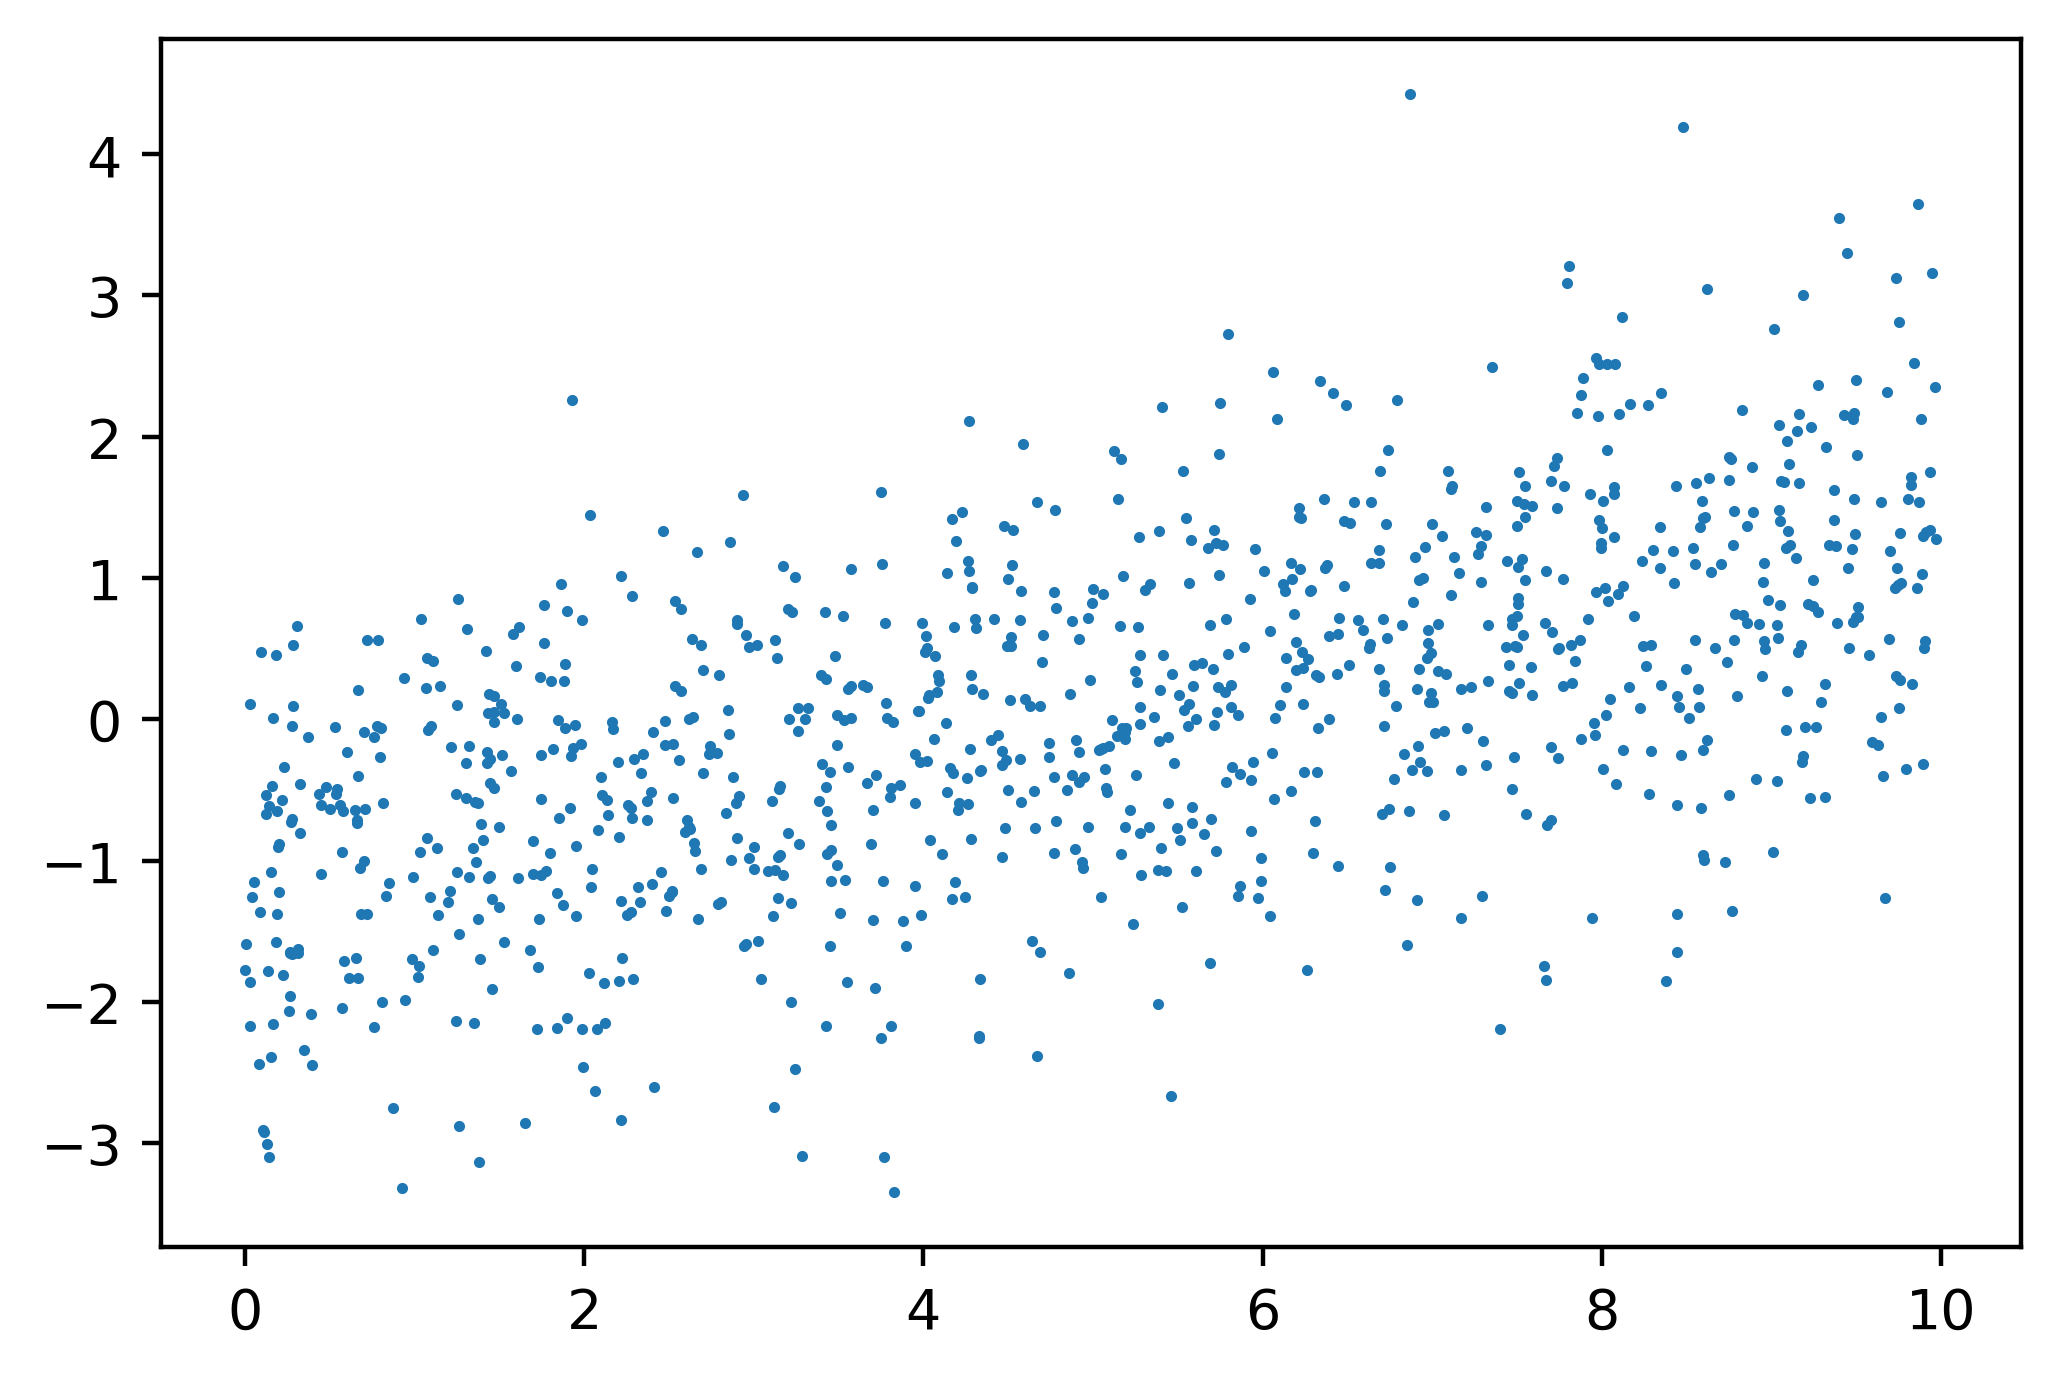

In [23]:
mpl.rcParams['figure.dpi'] = 400
plt.scatter(X,y,s=1)

Linear Regression on Scikit-Learn

In [24]:
lin_reg = sk.linear_model.LinearRegression()
lin_reg

LinearRegression()

In [25]:
lin_reg.fit(X.reshape(-1,1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.1612566002825888
[0.24002588]


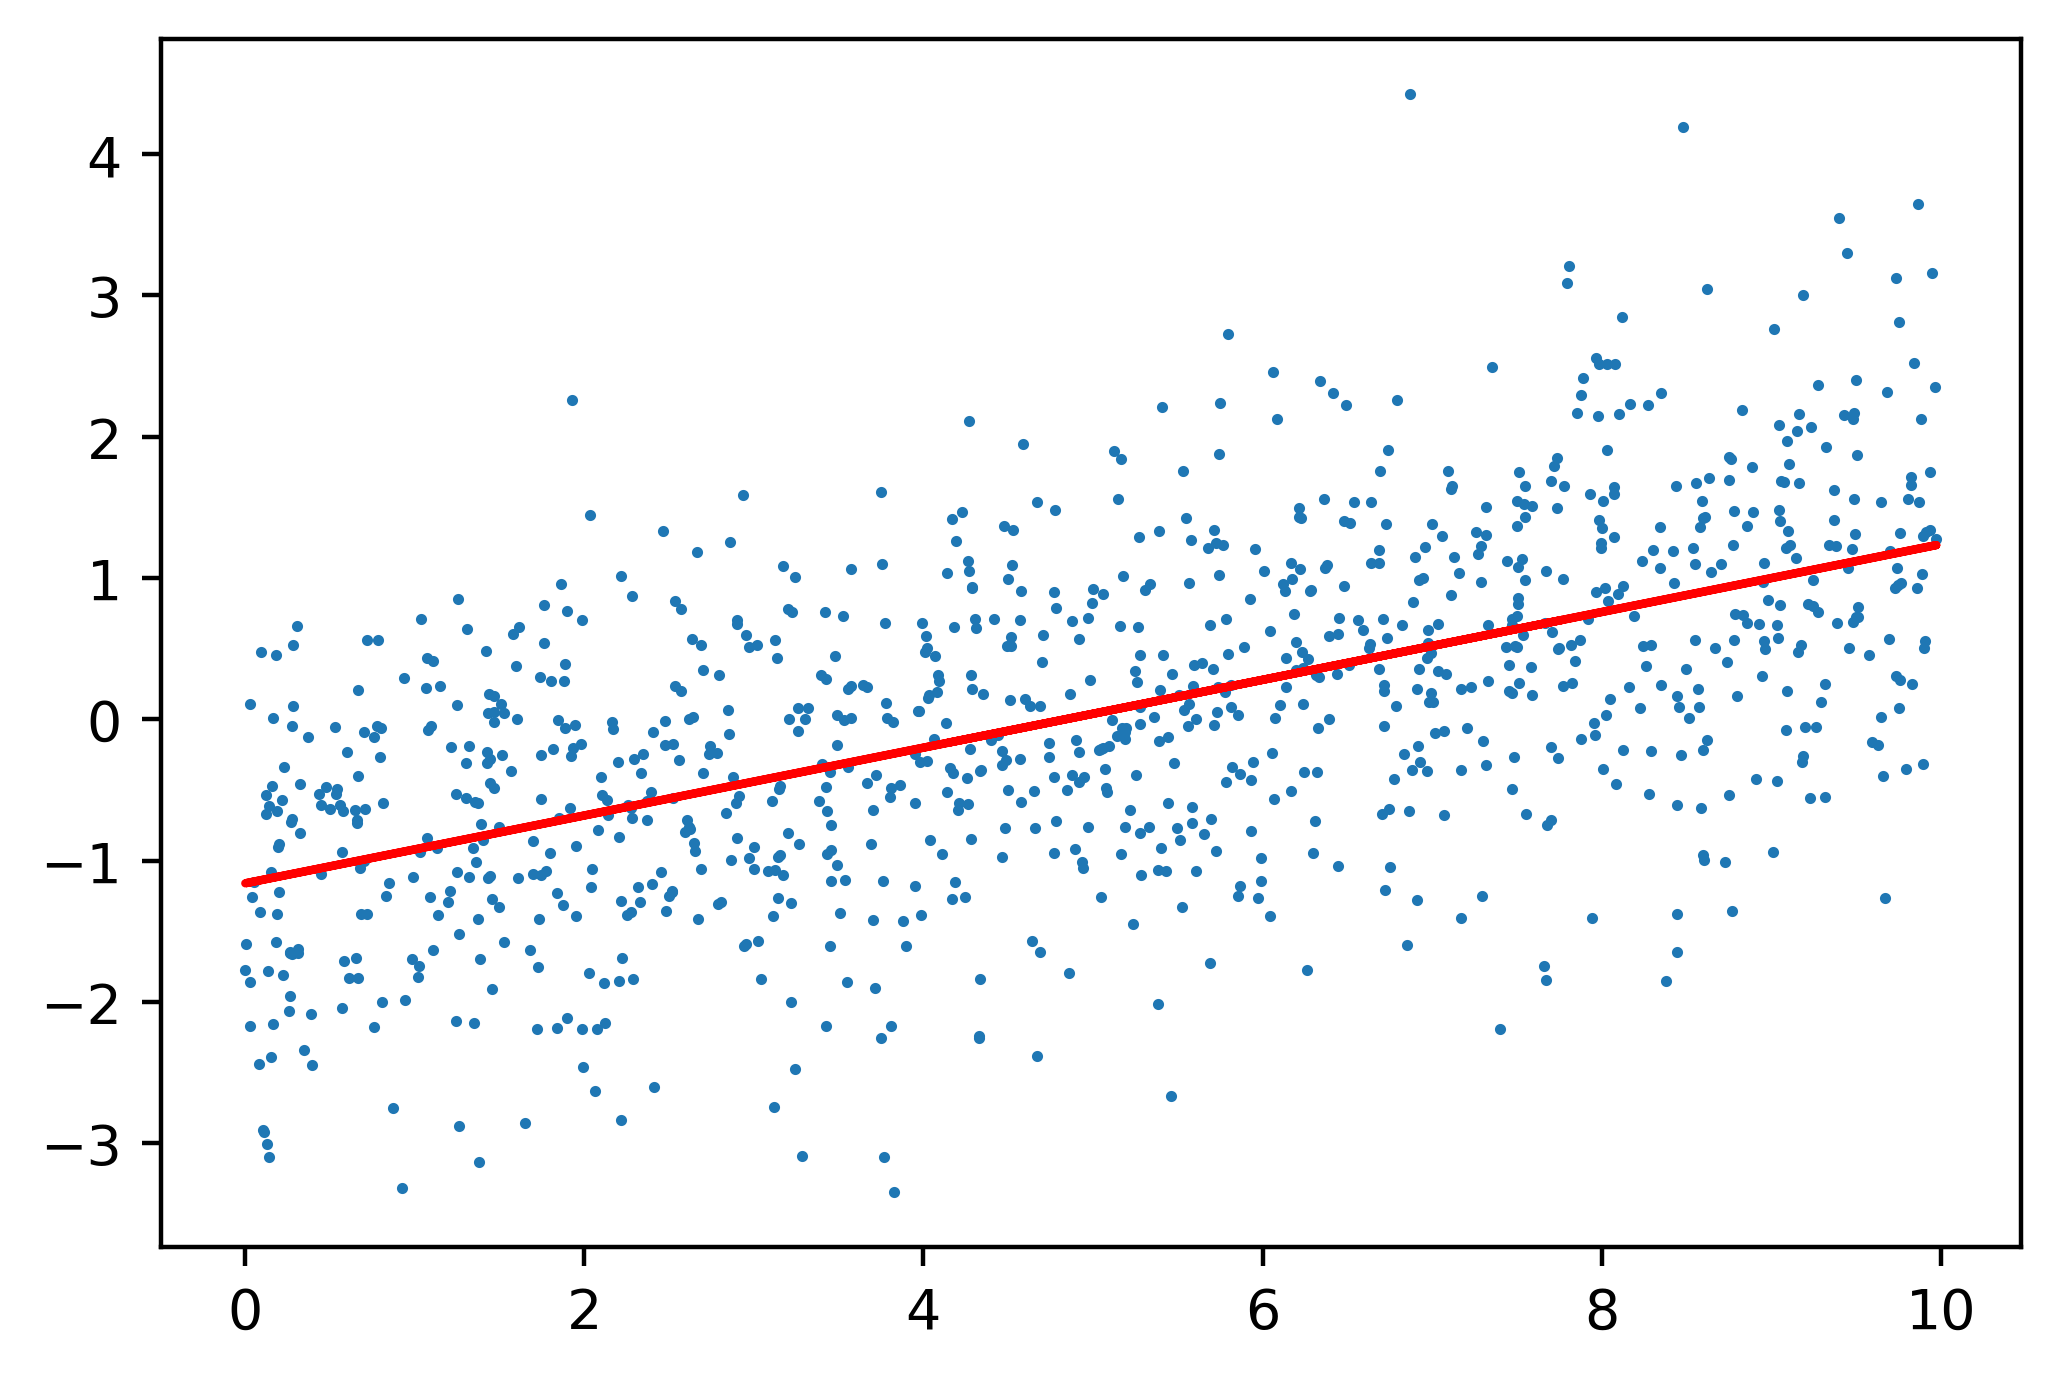

In [26]:
y_pred = lin_reg.predict(X.reshape(-1,1))
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

In [27]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data['EDUCATION'].values.reshape(-1,1), data['default payment next month'].values,test_size=0.2, random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [28]:
print(np.mean(y_train))
print(np.mean(y_test))

0.223102526838873
0.21657603600225014


In [30]:
edu_reg = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='auto', verbose=0, warm_start=False,n_jobs=None, l1_ratio=None)

In [31]:
edu_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

Different ways to evaluate the model accuracy

In [32]:
y_predict = edu_reg.predict(X_test)
is_correct = y_predict == y_test
np.mean(is_correct)

0.7834239639977498

In [33]:
edu_reg.score(X_test,y_test)

0.7834239639977498

In [34]:
sk.metrics.accuracy_score(y_test,y_predict)

0.7834239639977498

Confusion matrix (manual)

In [35]:
P = sum(y_test)
N = len(y_test) - P

In [36]:
TP = sum((y_test==1) & (y_predict==1))
TPR = TP/P

In [37]:
FN = sum( (y_test==1) & (y_predict==0) )
FNR = FN/P

In [38]:
TN = sum((y_test==0) & (y_predict==0))
TNR = TN/N

In [39]:
FP = sum((y_test==0) & (y_predict==1))
FPR = FP/N

In [40]:
print('True Negative Rate: {}\t\tFalse Positive Rate: {}\nFalse Negative Rate: {}\tTrue Positive Rate:{}'.format(TNR, FPR, FNR, TPR))

True Negative Rate: 1.0		False Positive Rate: 0.0
False Negative Rate: 1.0	True Positive Rate:0.0


In [41]:
sk.metrics.confusion_matrix(y_test, y_predict)

array([[4178,    0],
       [1155,    0]], dtype=int64)

Prediction Probabilites

In [42]:
y_pred_proba = edu_reg.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [43]:
prob_sum = np.sum(y_pred_proba,1)
np.unique(prob_sum)

array([1.])

In [44]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Text(0, 0.5, 'Number of samples')

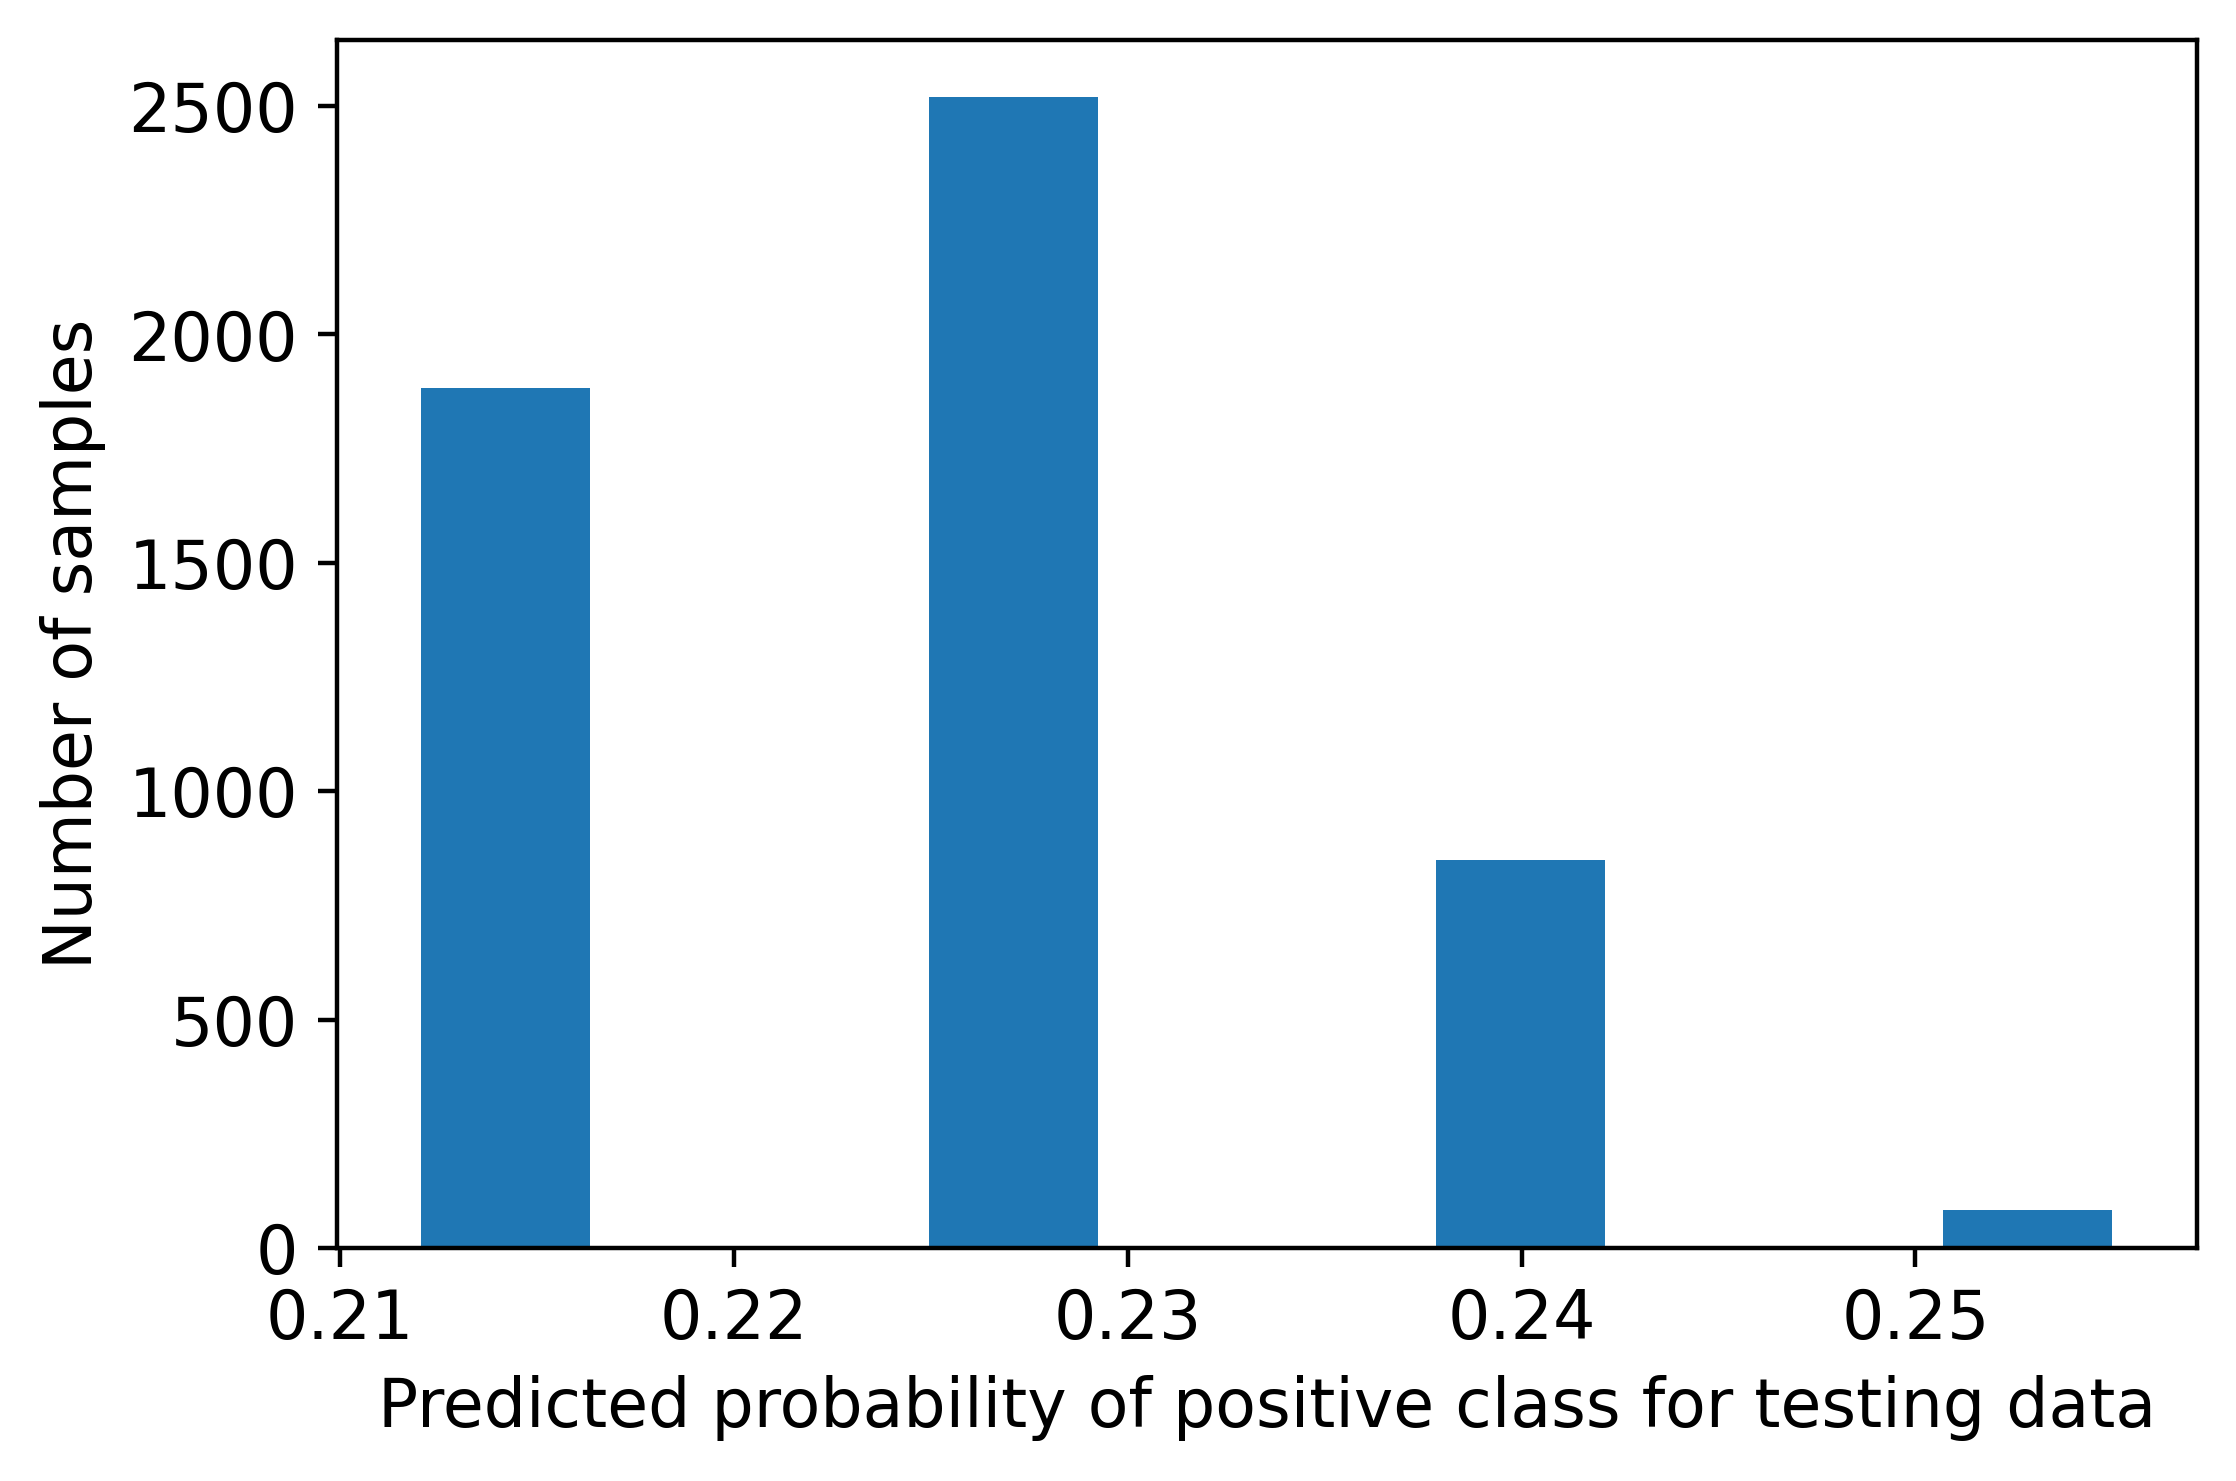

In [45]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [46]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

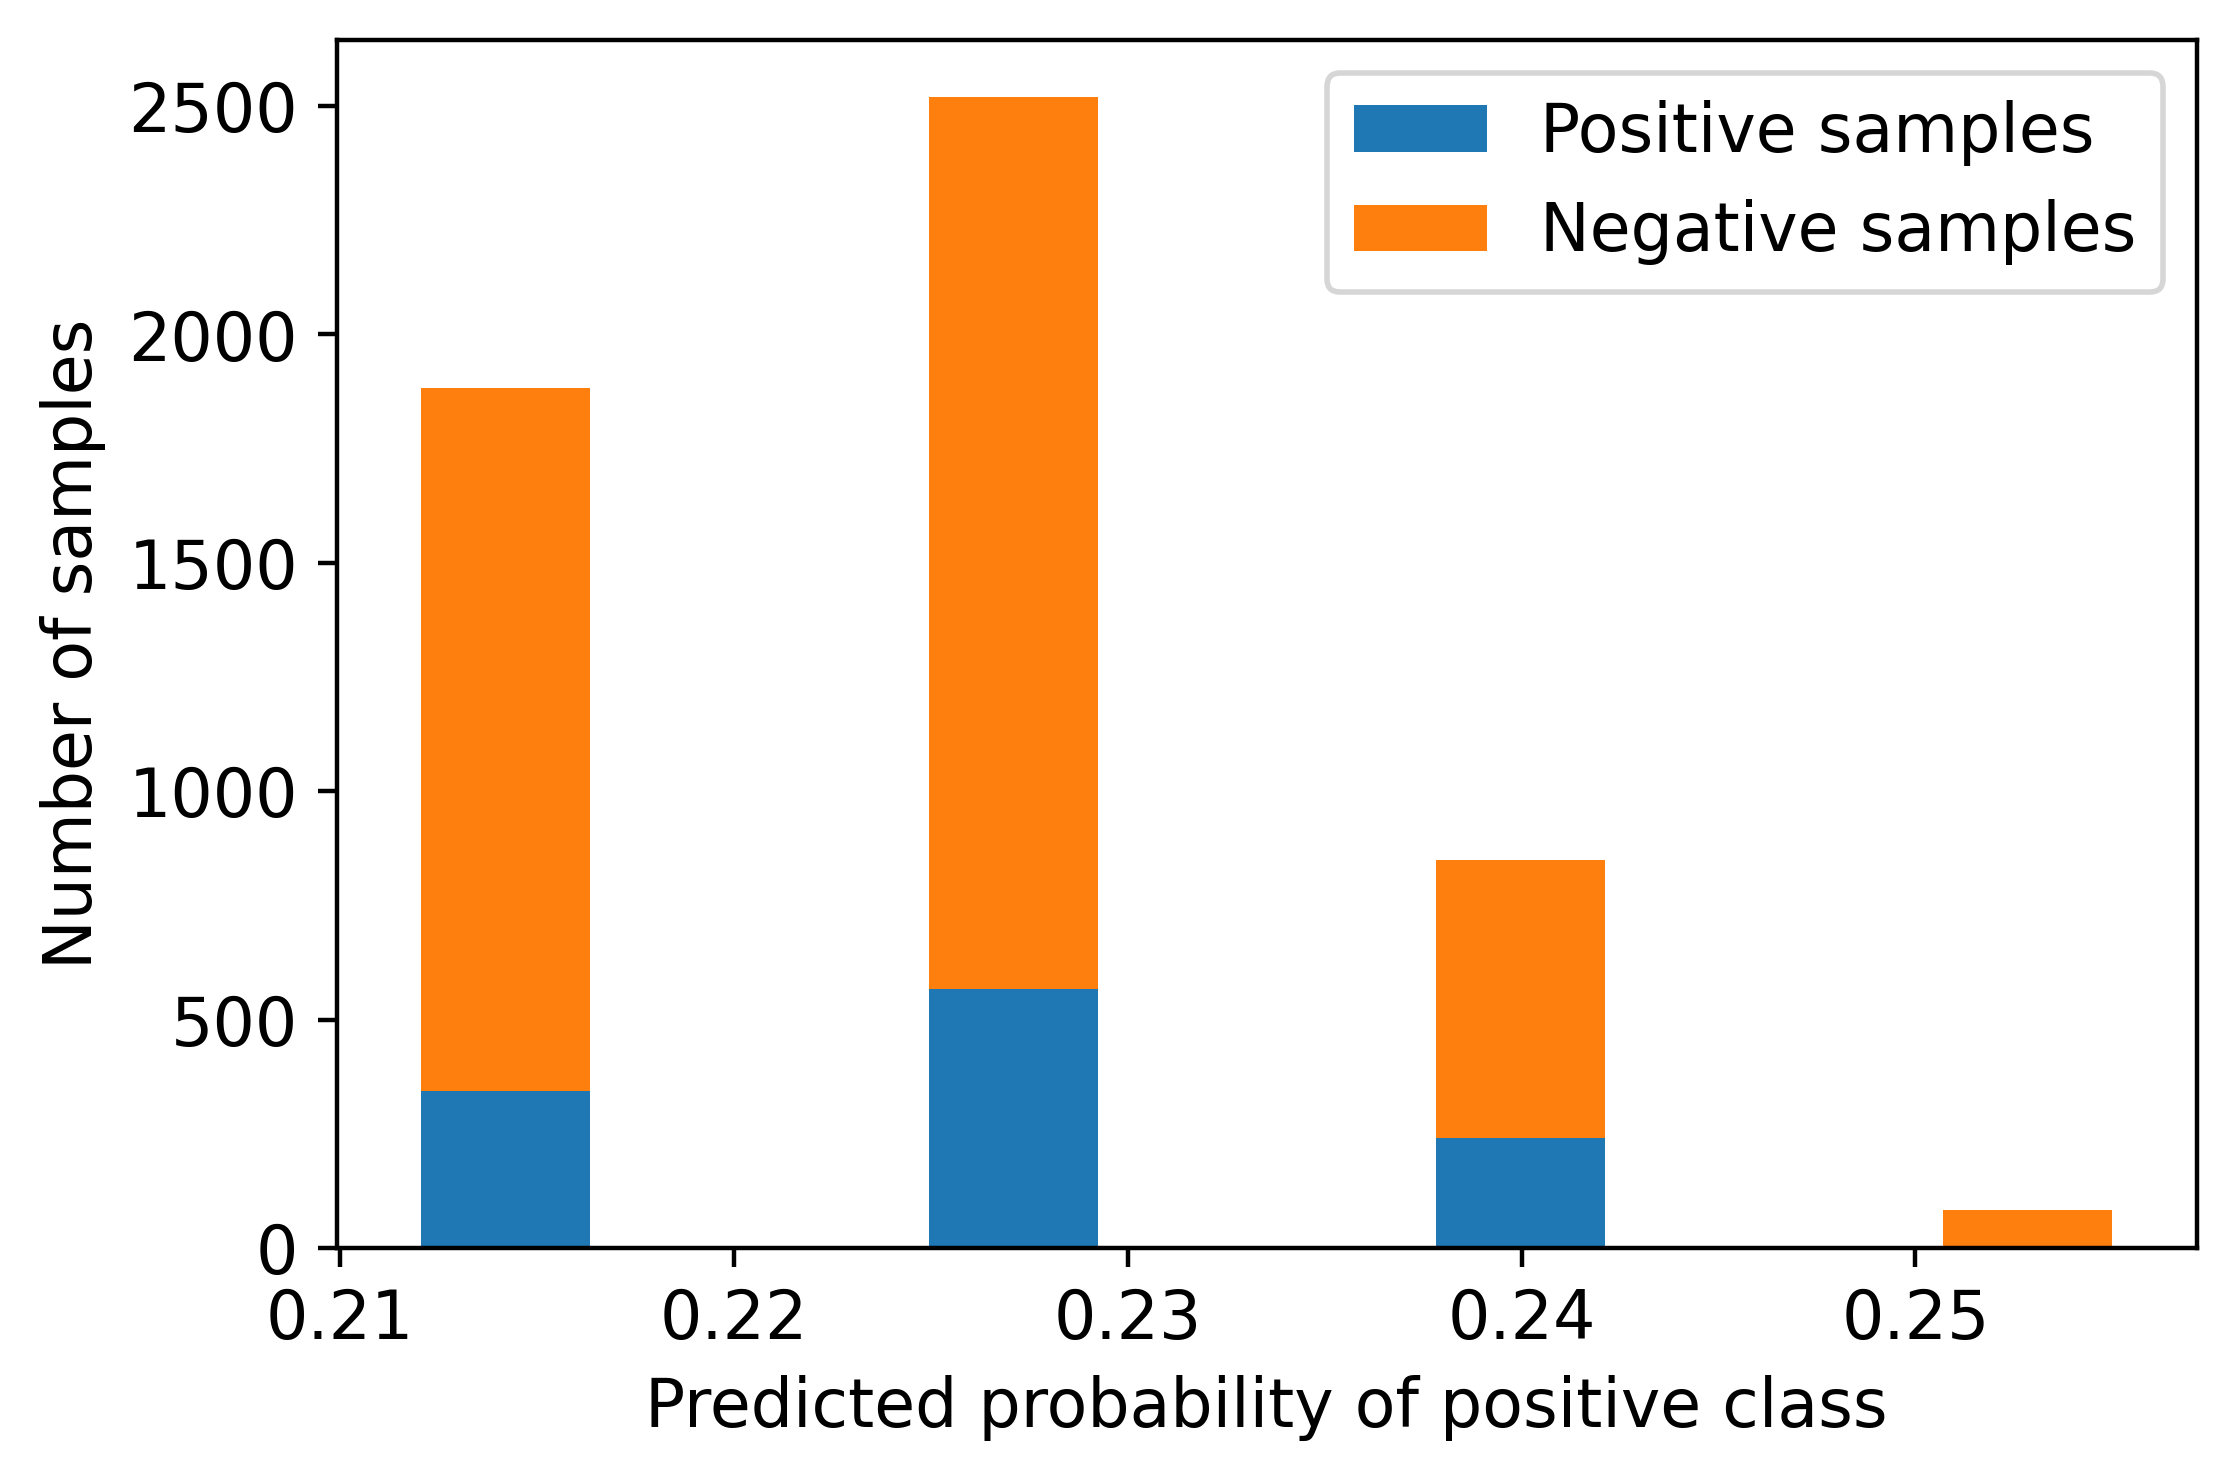

In [47]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba],
histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

Receiver operating characteristics curve (ROC curve)

Text(0.5, 1.0, 'ROC curve')

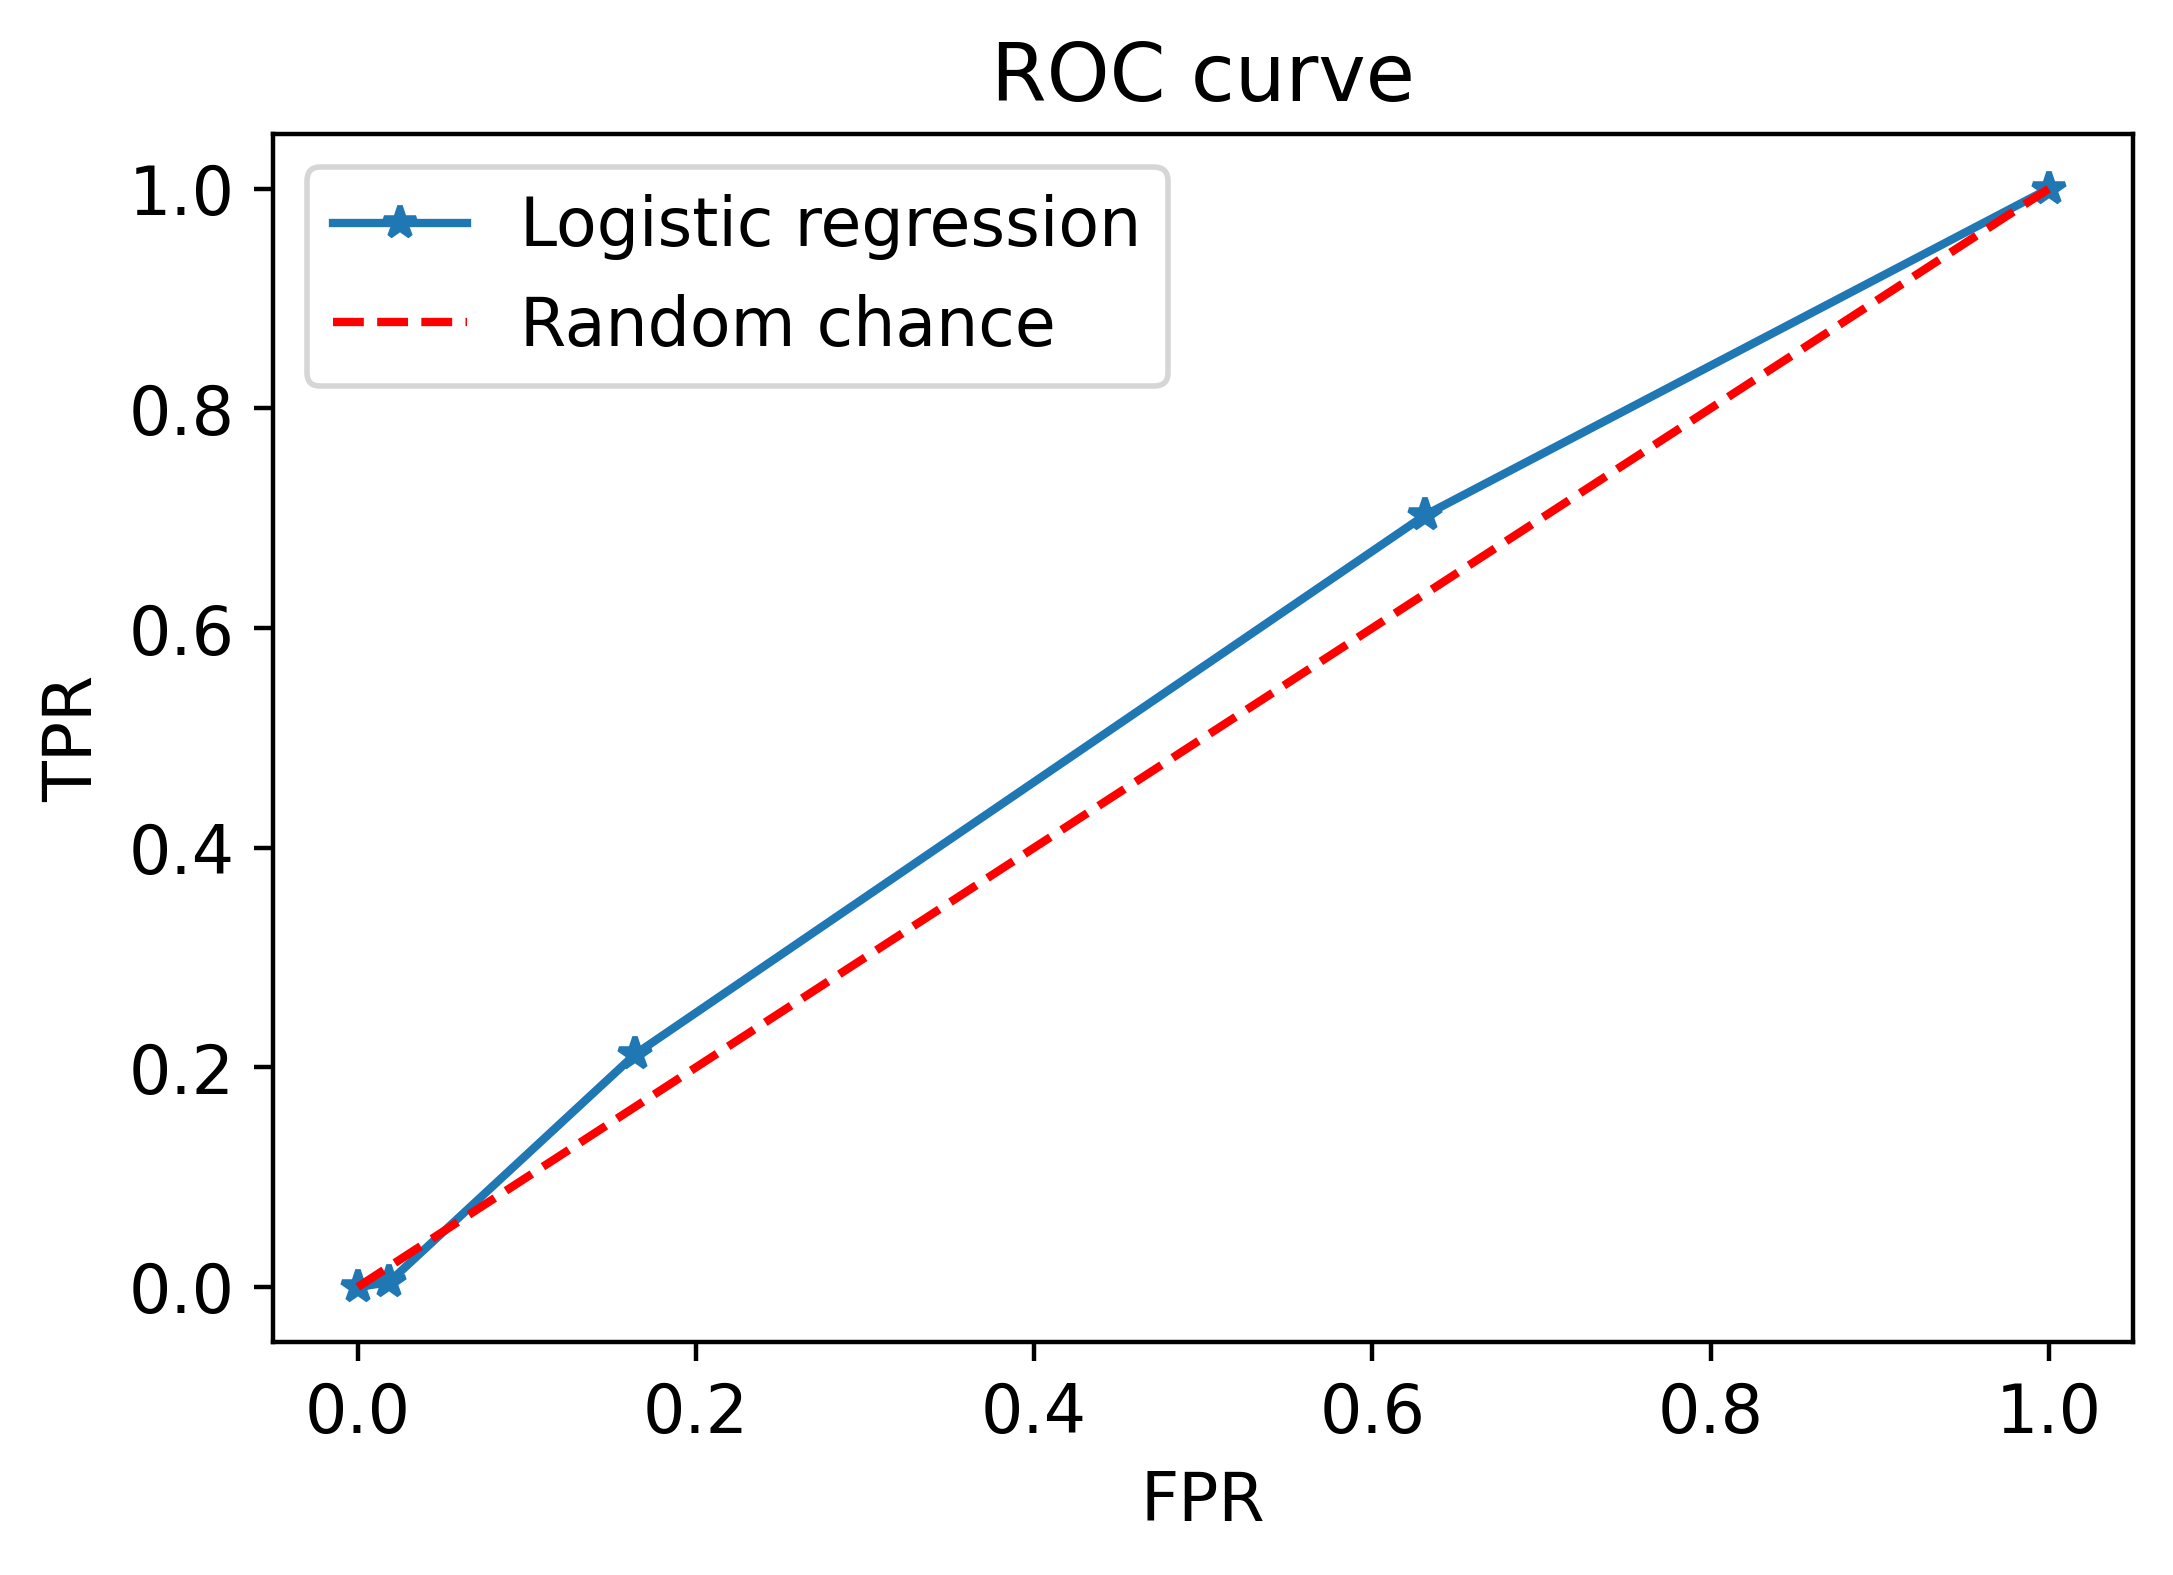

In [49]:
fpr, tpr, thresholds = sk.metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [50]:
sk.metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

In [51]:
sk.metrics.precision_recall_curve(y_test, pos_proba)

(array([0.21657604, 0.23536232, 0.26315789, 0.06097561, 1.        ]),
 array([1.        , 0.7030303 , 0.21212121, 0.004329  , 0.        ]),
 array([0.21207085, 0.22576598, 0.24007604, 0.2549944 ]))

# Activity 2: Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In [4]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data['LIMIT_BAL'].values.reshape(-1,1), data['default payment next month'].values,test_size=0.2)

In [5]:
log_reg = sk.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [6]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [8]:
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob

array([[0.53453575, 0.46546425],
       [0.8208323 , 0.1791677 ],
       [0.58562501, 0.41437499],
       ...,
       [0.93269874, 0.06730126],
       [0.95743294, 0.04256706],
       [0.79957389, 0.20042611]])

In [11]:
from sklearn import metrics
metrics.roc_auc_score(y_test,y_pred_prob[:,1])

0.6202158058939252

Text(0.5, 1.0, 'ROC curve')

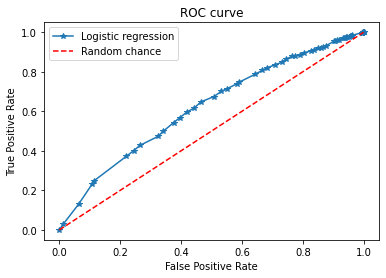

In [13]:
FPR, TPR, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.plot(FPR, TPR, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

Text(0.5, 1.0, 'Precision-recall curve')

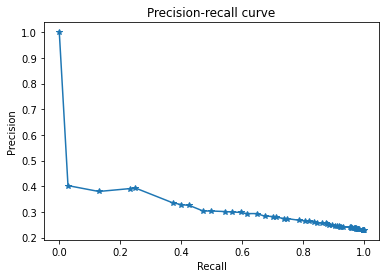

In [23]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob[:,1])
plt.plot(recall,precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')

In [24]:
metrics.auc(recall, precision)

0.3272653307987504

In [25]:
metrics.average_precision_score(y_test, y_pred_prob[:,1])

0.31320217110656257

The average precision score and area under the precision recall curve are slightly different although they represent the same metric. That is because the auc is calculated using a trapezoidal approximation of the integral under the curve, and the average precision score recalculates the average precision everytime a new positive is recalled.

In [26]:
y_pred_train = log_reg.predict_proba(X_train)
metrics.roc_auc_score(y_train,y_pred_train[:,1])

0.6182906555829306

Conceptually, the difference is that the probabilities are not really a prediction, given that the model was trained using the same data that it is predicting. In a way the probabilities relate more to how well the response variable is related to the features used to train the model.